A first attempt at analysing the Iris Data set by Fisher. I will also attempt a rudimentary machine learning algorithm to group the irises into their different classes.

The data is taken from this page: https://archive.ics.uci.edu/ml/datasets/Iris

The data contains the following attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolor 
-- Iris Virginica

The first step is to import libraries and read in the data. Then I examine the first few lines of the dataframe and check that there are 3 unique classes of Irises in the table.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Iris.csv', names = ["sepal length", "sepal width", "petal length", "petal width", "class"])
data.head()
df = pd.DataFrame(data)
print(df.head())
print(df['class'].unique())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Next I check the type of information encoded into the data frame and look at a summary of the data.
I know that the input file contains 150 rows so getting a count figure of 150 is a good sign!

In [2]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Next I examine the data for each type of Iris in the data set. First I look at Iris Setosa:

In [3]:
df[df['class'] == 'Iris-setosa'].describe()

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Then Iris Versicolour:

In [4]:
df[df['class'] == 'Iris-versicolor'].describe()

,sepal length,sepal width,petal length,petal width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


And finally Iris Virginica:

In [5]:
df[df['class'] == 'Iris-virginica'].describe()

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Next we look at the distribution of the different attributes using a box plot to look at the spread of the attributes and a histogram to examine whether the attributes follow a guassian distribution.

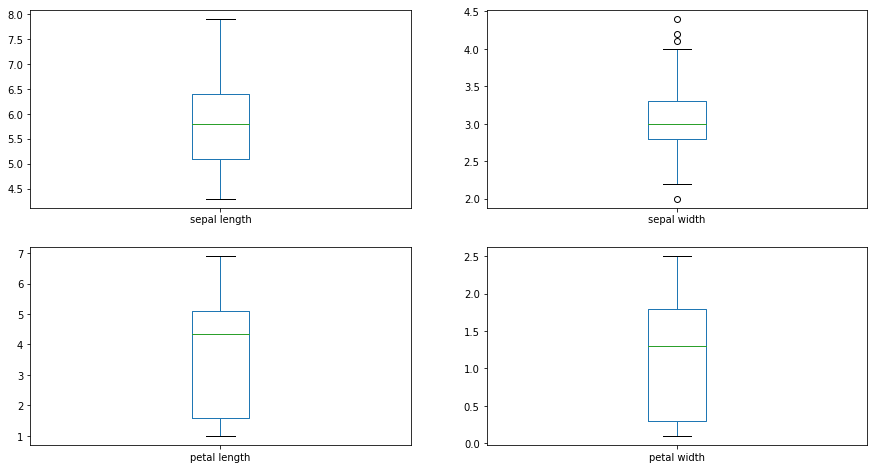

In [6]:
df.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)
iris_box = plt.gcf()
iris_box.set_size_inches(15, 8)
plt.show()

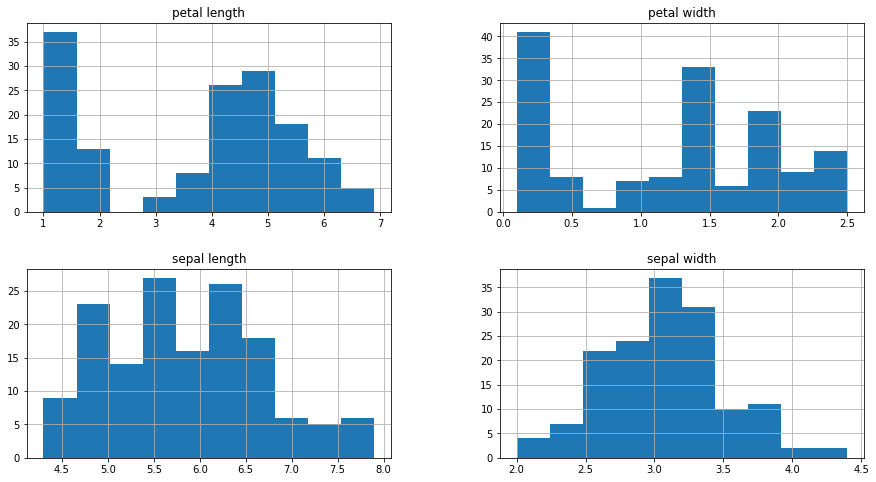

In [7]:
iris_hist = df.hist()
iris_hist = plt.gcf()
iris_hist.set_size_inches(15, 8)
plt.show()

From this we can see that the sepal length and sepal width attributes follow a roughly gaussian distribution.

Next we look at scatterplots.

Using seaborn we can make a pair plot to examine the relationships between the various attributes. We can then see if there are any particular attributes that could be used to build a classification algorithm.

C:\Users\Sam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


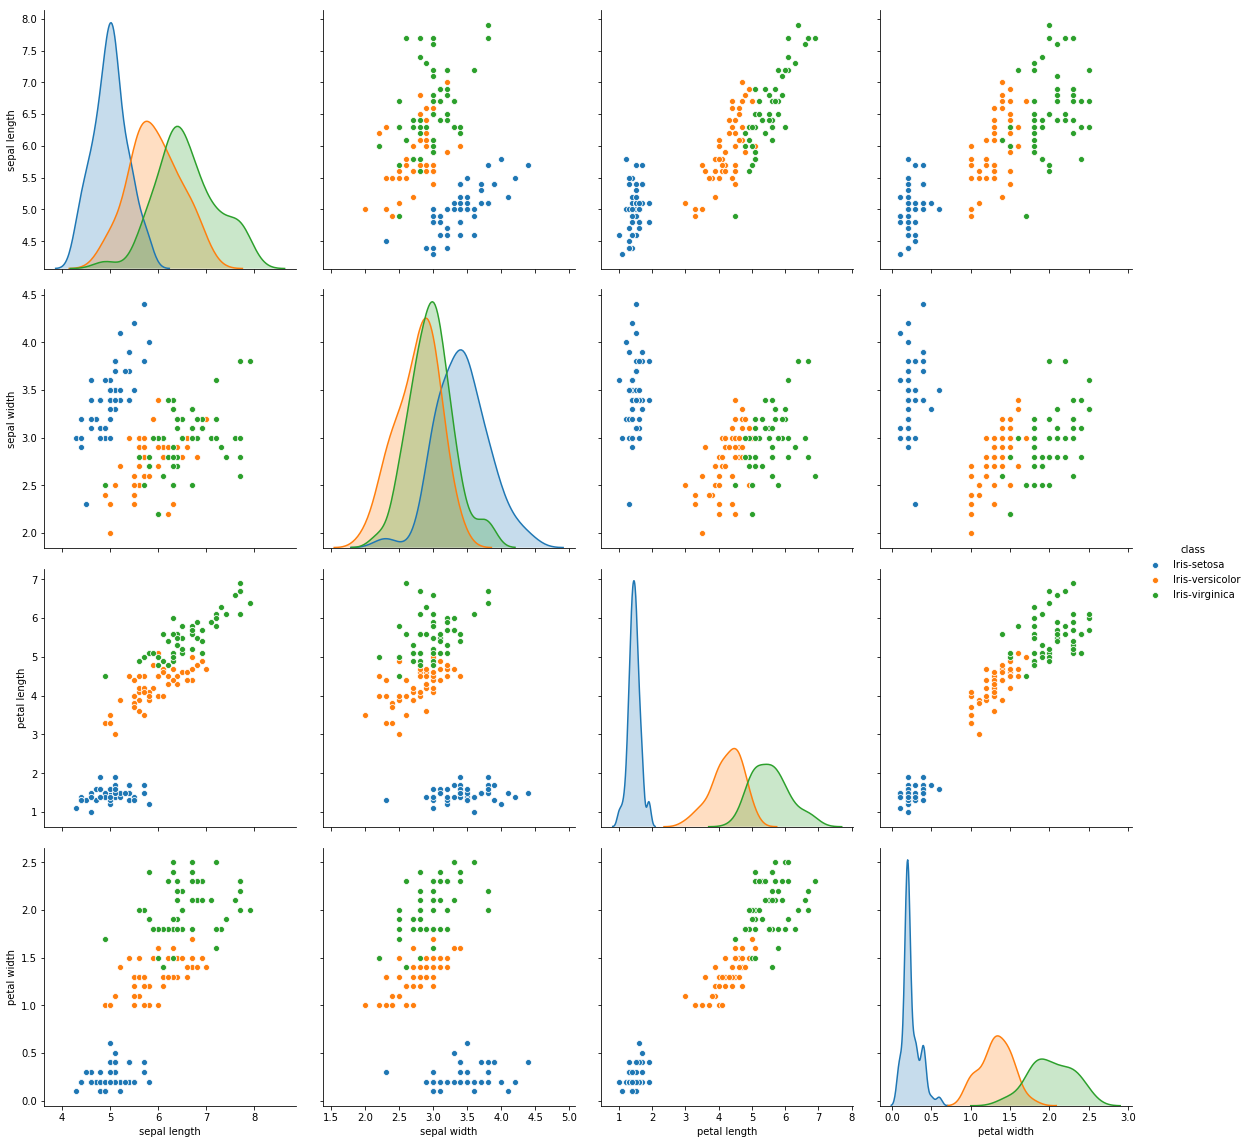

In [8]:
plt.close()
sns.pairplot(df, hue = 'class', height = 4)

From this we can see that iris setosa can be easily seperated from the other two iris types using any of the attributes, although certain attributes give a clearer indication of clustering than others. For example looking at the relationship between petal width and petal length shows a really tight grouping for the sentosa class. The versicola and virginica classes are harder to seperate as there is overlap between the features of the two classes. Lets have a closer look at the relationship between  petal width and petal length.

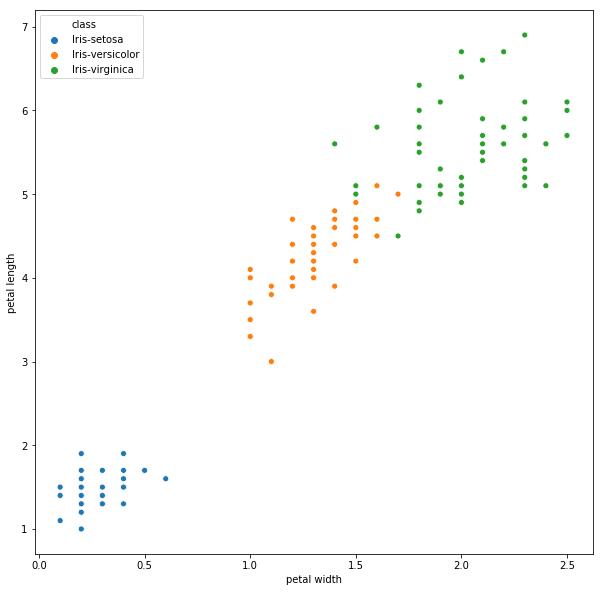

In [9]:
plt.close()
sns.scatterplot(x = df['petal width'], y = df['petal length'], hue = df['class'])
iris_scatter = plt.gcf()
iris_scatter.set_size_inches(10, 10)

Now lets use machine learning to attempt to find a rule to classify the different types of iris. Let's start by using a decision tree as this is a simple data set and the outputs of a decision tree are easy to understand. As this is my first attempt at machine learning I will be using the scikit-learn library. 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Specifying the prediction target, in this case the species or class:
y = df['class']

#Specifying the features we will use to build the decision tree. To start I will be using just the petal length and width:
iris_feat = ['petal length', 'petal width']
X = df[iris_feat]

#Now we build the model:
iris_petal_model = DecisionTreeClassifier(random_state = 1002)
iris_petal_model.fit(X, y)

#And now we make the predictions:
pred = iris_petal_model.predict(X)

#Checking the accuracy of the predictions
pd.crosstab(y, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,50,0,0,50
Iris-versicolor,0,49,1,50
Iris-virginica,0,0,50,50
All,50,49,51,150


So far so good, the model accurately classified 149 out of the 150 instances. However given that I trained the model using all of the available data and then made predictions on the same data it is not surprising that the model would be this accurate. Let's try this again by splitting the data into training and testing data. I will be using the train_test_split function from the sklearn library.

In [11]:
from sklearn.model_selection import train_test_split

#Splitting the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1002, test_size = 0.3)

#Specifying and training the model
iris_petal_model = DecisionTreeClassifier(random_state = 1002)
iris_petal_model.fit(train_X, train_y)

#And the predictions
val_pred = iris_petal_model.predict(val_X)

#Checking the accuracy of the predictions
pd.crosstab(val_y, val_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,19,0,0,19
Iris-versicolor,0,15,1,16
Iris-virginica,0,1,9,10
All,19,16,10,45


From this I can see that the model has now misclassified 2 of the instances: one of the vericolors has been classified as a virginica and one of he virginicas has been classified as a versicolor. This was a very simple model using only two of the features (petal length and petal width).

Lets see if we can improve the model by using all the attributes from the data set. 

In [13]:
#Specifying all the features of the data and the target
iris_feat = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df[iris_feat]
y = df['class']

#Splitting the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1002, test_size = 0.3)

#Training the model
iris_model_allat = DecisionTreeClassifier(random_state = 1002)
iris_model_allat.fit(train_X, train_y)

#Predictions
val_pred = iris_model_allat.predict(val_X)

#Checking the accuracy of the predictions
pd.crosstab(val_y, val_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,19,0,0,19
Iris-versicolor,0,15,1,16
Iris-virginica,0,1,9,10
All,19,16,10,45


This new model has the same accuracy. It seems that adding the extra attributes did not make the predictions any better.

In [15]:
from sklearn.ensemble import RandomForestClassifier

iris_forest_model = RandomForestClassifier(random_state = 1002)
iris_forest_model.fit(train_X, train_y)

forest_pred = iris_forest_model.predict(val_X)

pd.crosstab(val_y, forest_pred, rownames=['True'], colnames=['Predicted'], margins=True)

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,19,0,0,19
Iris-versicolor,0,14,2,16
Iris-virginica,0,0,10,10
All,19,14,12,45
